In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from PIL import Image  
import random

In [2]:
#data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
data = pd.read_csv("src/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(784,)


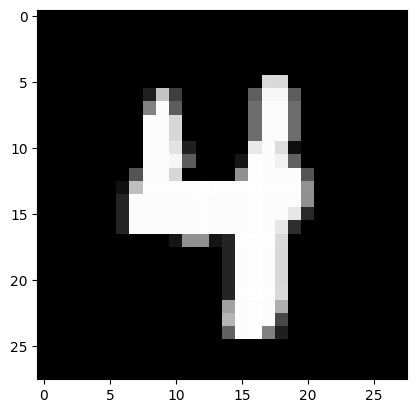

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
print(data[0][1:].shape)

plt.imshow(data[0][1:].reshape(28, 28), cmap="gray")

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return {"W1":W1, "b1":b1, "W2":W2,"b2": b2}

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    # True = 1 and False = 0
    return Z > 0
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)  
    
    # Gradients
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1/ m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1/ m * np.sum(dZ1)
    
    return {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return {"W1":W1, "b1":b1, "W2":W2,"b2": b2}
    

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    train_result_X, train_result_Y = [], []
    #test_result_Y = []
    params = init_params()
    for i in range(iterations):
        cache = forward_prop(params["W1"], params["b1"], params["W2"], params["b2"], X)
        gradients = back_prop(cache["Z1"], cache["A1"], cache["Z2"], cache["A2"], params["W1"], params["W2"], X, Y)
        params = update_params(params["W1"], params["b1"], params["W2"], params["b2"], gradients["dW1"], gradients["db1"], gradients["dW2"], gradients["db2"], alpha)
        if i % 10 == 0:
            #test_cache = forward_prop(params["W1"], params["b1"], params["W2"], params["b2"], X_test)
            train_result_Y.append(get_accuracy(get_predictions(cache["A2"]), Y))
            #test_result_Y.append(get_accuracy(get_predictions(test_cache["A2"]), Y_test))
            train_result_X.append(i)
    
    plt.plot(train_result_X, train_result_Y)
    #plt.plot(train_result_X, test_result_Y)
    plt.show()
    return params

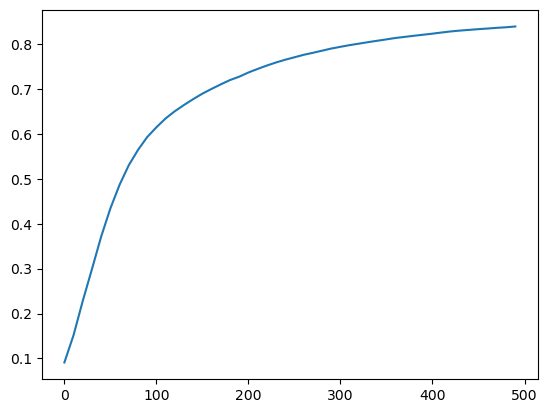

In [20]:
params = gradient_descent(X_train, Y_train, 500, 0.1)


In [45]:
print({"W1":params["W1"].shape, "b1":params["b1"].shape, "W2":params["W2"].shape,"b2":params["b2"].shape})

{'W1': (10, 784), 'b1': (10, 1), 'W2': (10, 10), 'b2': (10, 1)}


In [17]:
print(params)

{'W1': array([[ 0.1559244 , -0.23420021,  0.09246122, ..., -0.38242688,
        -0.12521569,  0.1884761 ],
       [-0.39831732,  0.31267058,  0.05755933, ...,  0.01307148,
        -0.28309438, -0.02512026],
       [ 0.33601979,  0.35543932, -0.38142519, ..., -0.14751899,
        -0.39775787,  0.42322411],
       ...,
       [-0.1608231 ,  0.44753073, -0.25186057, ..., -0.36712036,
         0.37085898,  0.33654923],
       [ 0.37450768,  0.31261028, -0.27684659, ...,  0.23358826,
        -0.2932965 ,  0.15234306],
       [-0.25816925,  0.06281151,  0.34537354, ...,  0.07245132,
        -0.05091867, -0.37284702]]), 'b1': array([[ 0.60142629],
       [ 0.25740135],
       [-0.26258438],
       [ 0.14705242],
       [ 0.72183719],
       [-0.24584009],
       [ 0.68947382],
       [ 0.51774226],
       [-0.15678981],
       [ 0.25475333]]), 'W2': array([[-0.85180863, -0.02628324, -0.31845516, -0.27937418, -0.23129558,
         0.12026661,  0.36346002,  0.09162516,  0.11613097,  0.71658073]

In [36]:
# Supposons que vous ayez vos matrices comme ceci (W1, b1, W2, b2)
# Vous pouvez les convertir en dictionnaire
parameters = {
    "W1": params["W1"].tolist(),
    "b1": params["b1"].tolist(),
    "W2": params["W2"].tolist(),
    "b2": params["b2"].tolist()
}
# Convertissez le dictionnaire en JSON
json_data = json.dumps(parameters)

# Enregistrez le JSON dans un fichier
with open("parametres.json", "w") as f:
    f.write(json_data)



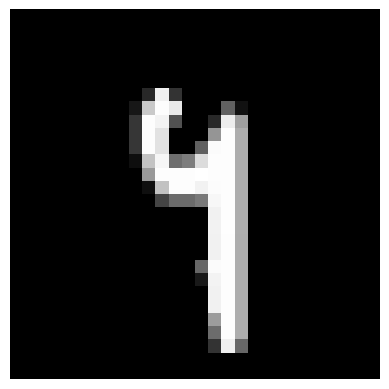

In [5]:
plt.imshow(data[1][1:].reshape(28, 28), cmap="gray", interpolation='nearest')
plt.axis('off')
plt.show()

In [17]:
images = [data[i][1:].reshape(28, 28) for i in range(256)]

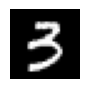

In [5]:
fig = plt.figure(figsize=(7/10, 7/10))
plt.axis('off')
plt.tight_layout(pad=0)
plt.autoscale(tight=True)
plt.subplots_adjust(wspace=0, hspace=0)


for i in range(209, 256):
    plt.imshow(images[i], cmap='gray')
    plt.savefig(f'website-design\mnist-images\{i}.png')

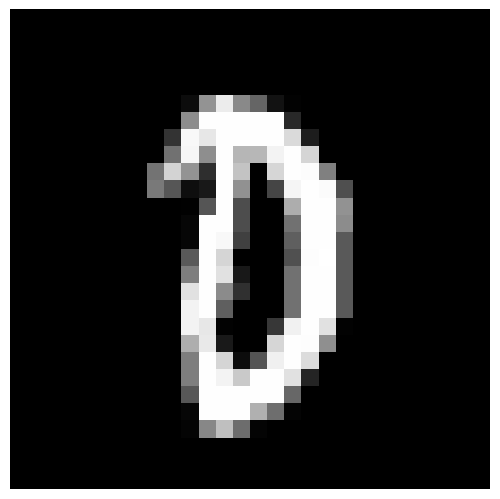

In [22]:
plt.imshow(images[1], cmap="gray", interpolation='nearest')
plt.axis("off")
plt.tight_layout(pad=0)
plt.autoscale(tight=True)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [6]:
image_import = [Image.open(f'website-design/mnist-images/{i}.png') for i in range(256)]

In [14]:
def grande_image(name, image_import):
    img  = Image.new( mode = "RGB", size = (16*70, 8*70))
    for i in range(16):
        for j in range(8):
            img.paste(image_import[i + j * 12], (i*70, j*70))
    img.save(f'website-design/{name}.png')
    #img.show()

def swap(image_import):
    co = image_import
    c = random.choices(co, k=64)
    for i in range(64):
        co[random.randint(0, len(co)-1)] = c[i]
    return co

In [16]:
for i in range(6):
    grande_image(f"{i}", image_import)
    image_import = swap(image_import)